In [1]:
import zipfile

# Download zip file of pizza steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-10-17 09:40:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 173.194.213.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   206MB/s    in 0.5s    

2023-10-17 09:40:09 (206 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the Data

A very crucial steap at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and floader scanning to understand the data you are working with.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

- A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.

- A test directory with the same structure as the train directory.

Let's inspect each of the directories that we have downloaded.

To do so, we can use the ls command which stands for list.

In [2]:
!ls pizza_steak

test  train


We can see we have got a train and test folder.

In [3]:
!ls pizza_steak/train/

pizza  steak


And how about inside the steak directory?

In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
# Similarly for test folder
!ls pizza_steak/test/

pizza  steak


In [7]:
!ls pizza_steak/test/pizza/

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

Whole bunch of images. But how many?

In [8]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and len{len(filenames)} images in '{dirpath}'")

There are 2 directories and len0 images in 'pizza_steak'
There are 2 directories and len0 images in 'pizza_steak/test'
There are 0 directories and len250 images in 'pizza_steak/test/pizza'
There are 0 directories and len250 images in 'pizza_steak/test/steak'
There are 2 directories and len0 images in 'pizza_steak/train'
There are 0 directories and len750 images in 'pizza_steak/train/pizza'
There are 0 directories and len750 images in 'pizza_steak/train/steak'


In [9]:
# Another way to find out how many images are there in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [11]:
# Get the class names (programatically, this is much more hellpful)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # Turn our training path into a python part
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Okay, so we have got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

In [12]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (512, 512, 3)


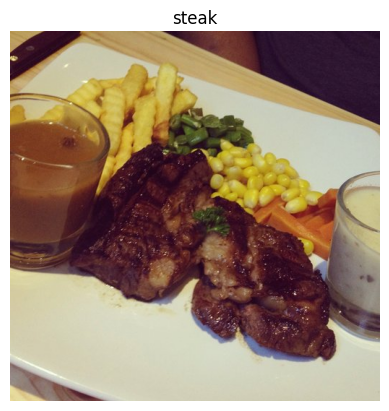

In [14]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

After going through a dozen or so images from the different classes, you can start to get an idea of what we are working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might have noticed we have been printitng the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [15]:
# View the img (actually just a big array/tensor)
img

array([[[180, 147,  78],
        [182, 149,  80],
        [185, 152,  83],
        ...,
        [ 41,  18,  44],
        [ 41,  18,  44],
        [ 41,  18,  44]],

       [[178, 145,  76],
        [178, 145,  76],
        [180, 147,  78],
        ...,
        [ 42,  19,  45],
        [ 42,  19,  45],
        [ 42,  19,  45]],

       [[180, 147,  78],
        [179, 146,  77],
        [177, 144,  75],
        ...,
        [ 40,  17,  43],
        [ 41,  18,  44],
        [ 41,  18,  44]],

       ...,

       [[234, 218, 156],
        [232, 216, 154],
        [229, 215, 152],
        ...,
        [204, 202, 179],
        [204, 202, 179],
        [205, 203, 180]],

       [[234, 218, 156],
        [233, 217, 155],
        [233, 217, 155],
        ...,
        [203, 201, 178],
        [203, 201, 178],
        [203, 201, 178]],

       [[234, 218, 156],
        [235, 219, 157],
        [235, 219, 157],
        ...,
        [203, 201, 178],
        [202, 200, 177],
        [202, 200, 177]]

In [16]:
# View the image shape
img.shape # returs (width, height, colour channels)

(512, 512, 3)

Looking at the image shape more closely, you will see it is in the form of (Width, Height, Colour channels)

In our case, the width and height vary but because we are dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You will notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

In [17]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.70588235, 0.57647059, 0.30588235],
        [0.71372549, 0.58431373, 0.31372549],
        [0.7254902 , 0.59607843, 0.3254902 ],
        ...,
        [0.16078431, 0.07058824, 0.17254902],
        [0.16078431, 0.07058824, 0.17254902],
        [0.16078431, 0.07058824, 0.17254902]],

       [[0.69803922, 0.56862745, 0.29803922],
        [0.69803922, 0.56862745, 0.29803922],
        [0.70588235, 0.57647059, 0.30588235],
        ...,
        [0.16470588, 0.0745098 , 0.17647059],
        [0.16470588, 0.0745098 , 0.17647059],
        [0.16470588, 0.0745098 , 0.17647059]],

       [[0.70588235, 0.57647059, 0.30588235],
        [0.70196078, 0.57254902, 0.30196078],
        [0.69411765, 0.56470588, 0.29411765],
        ...,
        [0.15686275, 0.06666667, 0.16862745],
        [0.16078431, 0.07058824, 0.17254902],
        [0.16078431, 0.07058824, 0.17254902]],

       ...,

       [[0.91764706, 0.85490196, 0.61176471],
        [0.90980392, 0.84705882, 0.60392157],
        [0.89803922, 0

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalisation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# 1.  Create a model
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                     kernel_size=3, # can also be(3,3)
                                                     activation="relu",
                                                     input_shape=(224,224,3)), # First layer specifies input shape
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2, # Pool size can also be (2,2)
                                                       padding="valid"), # padding can also be 'same'
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.Conv2D(10,3, activation="relu"), # activation='relu' == tf.keras.layers.activations.relu
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
                             ])

# 2.  Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
historyy = model.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.6575 - accuracy: 0.6507

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


47/47 [==============================] - 121s 3s/step - loss: 0.6575 - accuracy: 0.6507 - val_loss: 55.9947 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 114s 2s/step - loss: 0.4525 - accuracy: 0.7993 - val_loss: 54.7505 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 131s 3s/step - loss: 0.4188 - accuracy: 0.8127 - val_loss: 45.1321 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 135s 3s/step - loss: 0.3888 - accuracy: 0.8320 - val_loss: 50.2582 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 122s 3s/step - loss: 0.3503 - accuracy: 0.8467 - val_loss: 45.3335 - val_accuracy: 0.7800


Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~80% accuracy on the training set and ~80% accuracy on the test set).

However, our model only went through a binary classification problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

Since we have already fit a model, let's check out it's architecture.

In [23]:
# Check out the layyers in our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

Now there are a few new things here we haven't discussed, namely:

- The ImageDataGenerator class and the rescale parameter
- THe flow_from_directory() method
  - The batch_size parameter
  - The target_size parameter
- Conv2D layers (and the parameters which come with them)
- MaxPool2D layers (and their parameters).
- The steps_per_epoch and validation_steps parameters in the fit() function.

Before we dive into each of these, let's see what happens if we try to fit a model we have worked with previously to our data.

In [27]:
# Lets build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)), # Dense layers expect a 1-dimension
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_1 = model_1.fit(train_data, # Use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # Use the dsae validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 1.8186 - accuracy: 0.5060

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


47/47 [==============================] - 9s 161ms/step - loss: 1.8186 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.6932 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000


In [28]:
# Let's check out the second model's architecture
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 4)                 602116    
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
